In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df2 = pd.read_csv('https://raw.githubusercontent.com/Yorqinoyyy/agrobank_mockdata/refs/heads/main/agrobank_mocdata_taxlil1%20(2).csv', index_col=[0])
df2.head()

,Region,Customer_ID,Customer_Name,Gender,Age,Credit_Type,Credit_Amount,Interest_Rate,Loan_Term_Months,Start_Date,Payment_Status,Occupation,Account_Balance,region,district,district_population,branch_count,clients_in_district_rows,active_clients_district
0,Surxondaryo viloyati - Sherobod,d19911e6-91ca-43cb-a47e-cc29c24337b1,Brittany Aguilar,ayol,19,Ipoteka,340368908,14.32,48,2022-11-26,Kechikkan,Tadbirkor,19172711,Jizzax,G‘allaorol,17080,1,240,1129
1,Samarqand viloyati - Kattaqo‘rg‘on,40fba3a7-bbaa-4da7-8cdf-cd44c66f2ba2,James Carpenter,ayol,40,Biznes,294857793,23.23,24,2022-03-15,Jarayonda,Tadbirkor,44163771,Andijon,Andijon,535564,6,230,5751
2,Buxoro viloyati - Kogon,f955d5c8-1374-4346-998b-97120cb3b72c,Jorge Parks,ayol,48,Fermerlik,244907261,13.34,72,2024-08-24,Jarayonda,Talaba,75480208,Jizzax,Do‘stlik,92508,1,249,6524
3,Jizzax viloyati - Jizzax,87d64892-6672-4706-a3c3-505171369658,Manuel Richards,erkak,62,Fermerlik,431885936,17.98,72,2020-10-17,To'langan,O'qituvchi,67790378,Toshkent shahri,Shayxontohur,680292,7,83,77932
4,Xorazm viloyati - Yangibozor,442ba79e-91fd-44c2-9fe8-1226d861b7d1,Nicole Vargas,erkak,28,Fermerlik,90015033,15.26,60,2021-01-07,Jarayonda,Talaba,51483536,Jizzax,Jizzax,78543,1,235,3949


In [3]:
df_region = df2.groupby("region")[["branch_count", "clients_in_district_rows", "district_population"]].mean().reset_index()
df_region

,region,branch_count,clients_in_district_rows,district_population
0,Andijon,4.151297,231.383285,391076.259366
1,Buxoro,0.845706,229.270742,38557.299854
2,Fargʻona,3.165963,239.146273,228653.998594
3,Jizzax,1.174033,241.472376,62971.404696
4,Namangan,2.878049,232.569584,239491.698709
5,Navoiy,0.473759,235.317730,24596.110638
6,Qashqadaryo,0.501401,72.473389,20544.253501
7,Qoraqalpogʻiston Respublikasi,3.771978,243.173077,322597.567308
8,Samarqand,1.926694,121.094053,151608.399723
9,Sirdaryo,1.494505,242.986264,82705.818681


##👉 Bu orqali har bir viloyat bo‘yicha o‘rtacha filiallar soni, mijozlar soni va aholi sonini olaman.

In [4]:
df_region["potential_index"] = df_region["clients_in_district_rows"] / df_region["branch_count"]
df_region

,region,branch_count,clients_in_district_rows,district_population,potential_index
0,Andijon,4.151297,231.383285,391076.259366,55.737591
1,Buxoro,0.845706,229.270742,38557.299854,271.099828
2,Fargʻona,3.165963,239.146273,228653.998594,75.536650
3,Jizzax,1.174033,241.472376,62971.404696,205.677647
4,Namangan,2.878049,232.569584,239491.698709,80.808076
5,Navoiy,0.473759,235.317730,24596.110638,496.703593
6,Qashqadaryo,0.501401,72.473389,20544.253501,144.541899
7,Qoraqalpogʻiston Respublikasi,3.771978,243.173077,322597.567308,64.468318
8,Samarqand,1.926694,121.094053,151608.399723,62.850682
9,Sirdaryo,1.494505,242.986264,82705.818681,162.586397


👉 Bu shuni bildiradi: bitta filialga nechta mijoz to‘g‘ri keladi.

Agar ko‘rsatkich yuqori bo‘lsa, demak o‘sha hududda filial kam, mijoz ko‘p, ya’ni yangi filial ochish kerak.

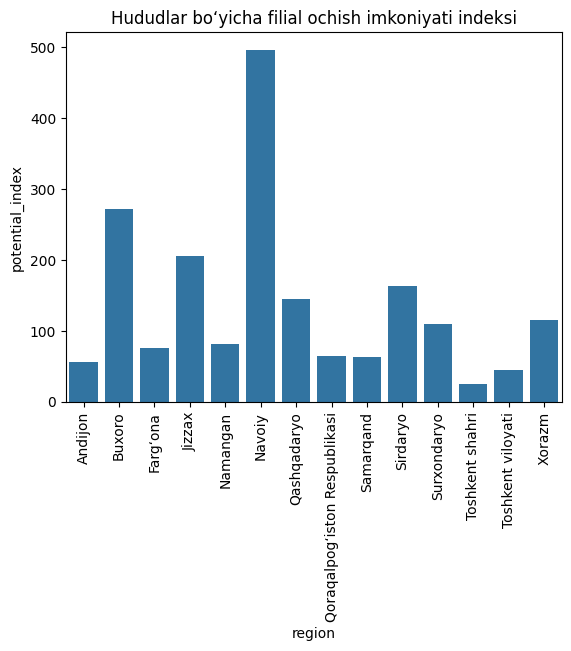

In [7]:
sns.barplot(data=df_region, x="region", y="potential_index")
plt.xticks(rotation=90)
plt.title("Hududlar bo‘yicha filial ochish imkoniyati indeksi")
plt.show()


##Grafikda eng baland ustun — bu hududda filial ochish uchun eng katta imkoniyat borligini bildiradi.

##“Tahlil natijasida Navpiy viloyatida filiallar soni kam, ammo mijozlar soni yuqori. Shu sababli, yangi filial aynan shu hududlarda ochilishi tavsiya etiladi.”

In [8]:
df2.groupby('region')['Credit_Amount'].sum().sort_values(ascending=False)


,Credit_Amount
region,
Toshkent shahri,189470628520
Samarqand,187654958613
Jizzax,187419427382
Xorazm,184418739366
Surxondaryo,183231885220
Qoraqalpogʻiston Respublikasi,181900610340
Sirdaryo,180129597482
Qashqadaryo,179350582946
Namangan,177652295074


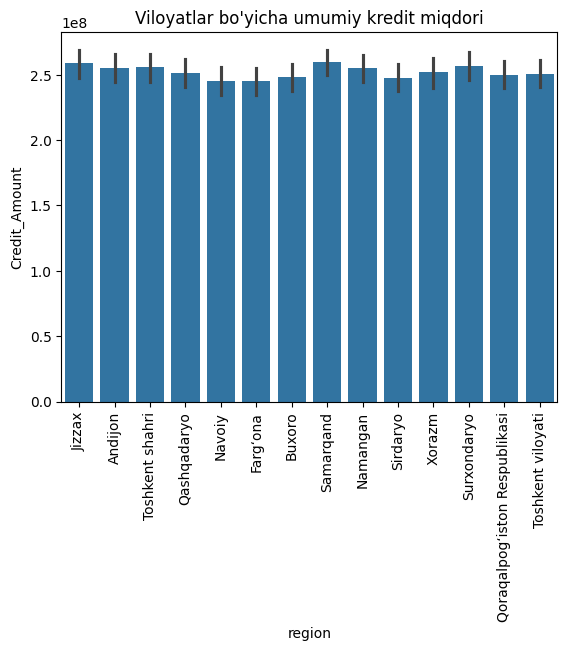

In [10]:
sns.barplot(x='region', y='Credit_Amount', data=df2)
plt.title("Viloyatlar bo'yicha umumiy kredit miqdori")
plt.xticks(rotation=90)
plt.show()

###Bu grafikda viloyatlar bo'yicha umumiy kriditlar ko'rsatilgan. ma'lumotlarim mock_data bo'lgani uchun ko'rsatgichlar deyarli bir biridan farq qilmayapti, asl ma'lumotlarda bu ko'rsatgiz notekis bo'ladi.